# Linear Regression Gradient Descent

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

### Training Data Initialization
In this section, the training data for a machine learning model is initialized. The input features are stored in the array `x_train_data`, and the corresponding output labels are stored in the array `y_train_labels`.

In [2]:
# Initialize training data for a machine learning model
x_train_data = np.array([1.0, 2.0])
y_train_labels = np.array([300.0, 500.0])

### Cost Computation Function
This function, `compute_cost`, calculates the mean squared error cost for a linear regression model. It takes input features, output labels, weight, and bias as parameters and returns the computed cost.

In [3]:
def compute_cost(input_features, output_labels, weight, bias):
    """
    Compute the mean squared error cost for a linear regression model.

    Parameters:
    - input_features: Input features as a NumPy array.
    - output_labels: Output labels as a NumPy array.
    - weight: Weight parameter of the linear regression model.
    - bias: Bias parameter of the linear regression model.

    Returns:
    - cost: Mean squared error cost.
    """
    m = input_features.shape[0]
    total_cost = 0

    # Calculate the total squared error
    for i in range(m):
        f_wb = weight * input_features[i] + bias
        cost = (f_wb - output_labels[i]) ** 2
        total_cost += cost

    # Calculate the mean squared error
    cost = total_cost * 1 / (2 * m)
    return cost

### Gradient Computation Function
The function `compute_gradient` calculates the gradient of the cost function with respect to weight and bias for a linear regression model. It takes input features, output labels, weight, and bias as parameters and returns the computed gradients.

<p align="center">
    <img src="2_gradient_lin_reg.png" alt="Linear Regression Cost" />
</p>

In [4]:
def compute_gradient(input_features, output_labels, weight, bias):
    """
    Compute the gradient of the cost function with respect to weight and bias.

    Parameters:
    - input_features: Input features as a NumPy array.
    - output_labels: Output labels as a NumPy array.
    - weight: Weight parameter of the linear regression model.
    - bias: Bias parameter of the linear regression model.

    Returns:
    - dj_dw: Gradient with respect to weight.
    - dj_db: Gradient with respect to bias.
    """
    m = input_features.shape[0]
    dj_db = 0
    dj_dw = 0

    # Calculate gradients for each training example
    for i in range(m):
        f_wb = weight * input_features[i] + bias
        dj_db_i = (f_wb - output_labels[i])
        dj_dw_i = (f_wb - output_labels[i]) * input_features[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i

    # Average gradients over all examples
    dj_db *= (1 / m)
    dj_dw *= (1 / m)

    return dj_dw, dj_db

### Gradient Descent Optimization
The function `gradient_descent` performs gradient descent optimization to update the parameters of a linear regression model. It takes input features, output labels, initial weights and bias, learning rate, number of iterations, cost function, and gradient function as parameters. The updated weight, bias, cost history, and parameter history are returned.

<p align="center">
    <img src="3_weight_updation.png" alt="Linear Regression Cost" />
</p>

In [11]:
def gradient_descent(input_features, output_labels, initial_weight, initial_bias, learning_rate, num_iterations, cost_function, gradient_function):
    """
    Perform gradient descent optimization to update model parameters.

    Parameters:
    - input_features: Input features as a NumPy array.
    - output_labels: Output labels as a NumPy array.
    - initial_weight: Initial weight parameter of the linear regression model.
    - initial_bias: Initial bias parameter of the linear regression model.
    - learning_rate: The learning rate for gradient descent.
    - num_iterations: Number of iterations for gradient descent.
    - cost_function: Cost function to be minimized.
    - gradient_function: Function to compute the gradient of the cost function.

    Returns:
    - updated_weight: Updated weight parameter.
    - updated_bias: Updated bias parameter.
    - cost_history: List containing the cost at each iteration.
    - parameter_history: List containing the parameters (weight, bias) at each iteration.
    """
    cost_history = []
    parameter_history = []
    bias = initial_bias
    weight = initial_weight

    for i in range(num_iterations):
        dj_dw, dj_db = gradient_function(input_features, output_labels, weight, bias)
        bias = bias - (learning_rate * dj_db)
        weight = weight - (learning_rate * dj_dw)
        cost_history.append(cost_function(input_features, output_labels, weight, bias))
        parameter_history.append([weight, bias])

        # Display progress every 1000 iterations
        if i % 1000 == 0:
            print(f"Iteration: {i}: ", end=" ")
            print(f"Cost: {cost_history[-1]:.5f}", end=" ")
            print(f"Parameters: w: {parameter_history[-1][0]:.3f}, b: {parameter_history[-1][1]:.3f}", end="\n\n")

    return weight, bias, cost_history, parameter_history

### Gradient Descent Execution
Here, gradient descent is applied to update the parameters of a linear regression model. The initial weight (`initial_weight`) and bias (`initial_bias`) are set to 0. The optimization runs for 1000 iterations with a learning rate of 0.1. The final parameters, cost history, and parameter history are obtained.

In [12]:
# Initialize parameters
initial_weight = 0
initial_bias = 0

# Gradient descent settings
num_iterations = 10000
learning_rate = 0.01

# Run gradient descent
final_weight, final_bias, cost_history, parameter_history = gradient_descent(x_train_data, y_train_labels, initial_weight, initial_bias, learning_rate, num_iterations, compute_cost, compute_gradient)

Iteration: 0:  Cost: 79274.81250 Parameters: w: 6.500, b: 4.000

Iteration: 1000:  Cost: 3.41251 Parameters: w: 194.915, b: 108.228

Iteration: 2000:  Cost: 0.79290 Parameters: w: 197.549, b: 103.966

Iteration: 3000:  Cost: 0.18423 Parameters: w: 198.818, b: 101.912

Iteration: 4000:  Cost: 0.04281 Parameters: w: 199.430, b: 100.922

Iteration: 5000:  Cost: 0.00995 Parameters: w: 199.725, b: 100.444

Iteration: 6000:  Cost: 0.00231 Parameters: w: 199.868, b: 100.214

Iteration: 7000:  Cost: 0.00054 Parameters: w: 199.936, b: 100.103

Iteration: 8000:  Cost: 0.00012 Parameters: w: 199.969, b: 100.050

Iteration: 9000:  Cost: 0.00003 Parameters: w: 199.985, b: 100.024



### Cost Visualization
The code generates two plots to visualize the cost versus iteration during the gradient descent optimization. The left plot displays the entire history, while the right plot focuses on the tail of the iteration steps. This helps in observing the convergence behavior of the optimization process.

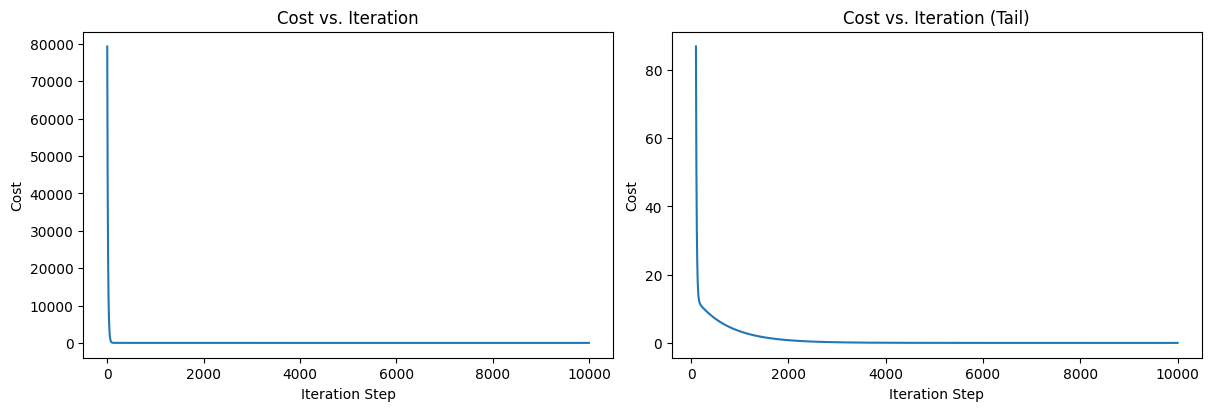

In [13]:
# Plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_history)
ax2.plot(100 + np.arange(len(cost_history[100:])), cost_history[100:])
ax1.set_title("Cost vs. Iteration")
ax2.set_title("Cost vs. Iteration (Tail)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('Iteration Step')
ax2.set_xlabel('Iteration Step')
plt.show()